In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
def compute_pca(X, dataset_name):
    print(f"\n====== {dataset_name} ======")
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    cov_matrix = np.cov(X_scaled, rowvar=False)
    print("\nCovariance Matrix:\n", cov_matrix)
    
    eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)
    
    idx = np.argsort(eig_vals)[::-1]
    eig_vals = eig_vals[idx]
    eig_vecs = eig_vecs[:, idx]
    
    print("\nEigenvalues:\n", eig_vals)
    print("\nEigenvectors (columns are eigenvectors):\n", eig_vecs)
    
    X_pca_manual = X_scaled.dot(eig_vecs[:, :2])
    
    pca = PCA(n_components=2)
    X_pca_sklearn = pca.fit_transform(X_scaled)
    print("\nExplained Variance (sklearn PCA):", pca.explained_variance_)
    print("Explained Variance Ratio:", pca.explained_variance_ratio_)
    
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    axes[0].scatter(X_pca_manual[:,0], X_pca_manual[:,1], color='blue', s=30)
    axes[0].set_title(f'{dataset_name} - Manual PCA')
    axes[0].set_xlabel('PC1'); axes[0].set_ylabel('PC2')

    axes[1].scatter(X_pca_sklearn[:,0], X_pca_sklearn[:,1], color='green', s=30)
    axes[1].set_title(f'{dataset_name} - sklearn PCA')
    axes[1].set_xlabel('PC1'); axes[1].set_ylabel('PC2')

    plt.tight_layout()
    plt.show()
    
    return eig_vals, eig_vecs, X_pca_sklearn


====== Synthetic Dataset ======

Covariance Matrix:
 [[ 1.00334448  0.08169525 -0.41204089  0.6745175  -0.12917043]
 [ 0.08169525  1.00334448 -0.37904976 -0.45277032 -0.95127952]
 [-0.41204089 -0.37904976  1.00334448 -0.1714869   0.38797323]
 [ 0.6745175  -0.45277032 -0.1714869   1.00334448  0.40971128]
 [-0.12917043 -0.95127952  0.38797323  0.40971128  1.00334448]]

Eigenvalues:
 [2.38458503 1.87656945 0.5444967  0.16042022 0.05065101]

Eigenvectors (columns are eigenvectors):
 [[-0.0215748  -0.67220198  0.41604658 -0.61170439  0.02004998]
 [-0.62892975 -0.01542193  0.22088931  0.21277678  0.71424329]
 [ 0.31190515  0.45917825  0.83021066  0.04949846  0.01306426]
 [ 0.34207054 -0.57851479  0.14779971  0.72507532  0.02700755]
 [ 0.6242474   0.04881218 -0.25887961 -0.22882191  0.69896669]]

Explained Variance (sklearn PCA): [2.38458503 1.87656945]
Explained Variance Ratio: [0.47532728 0.37406284]


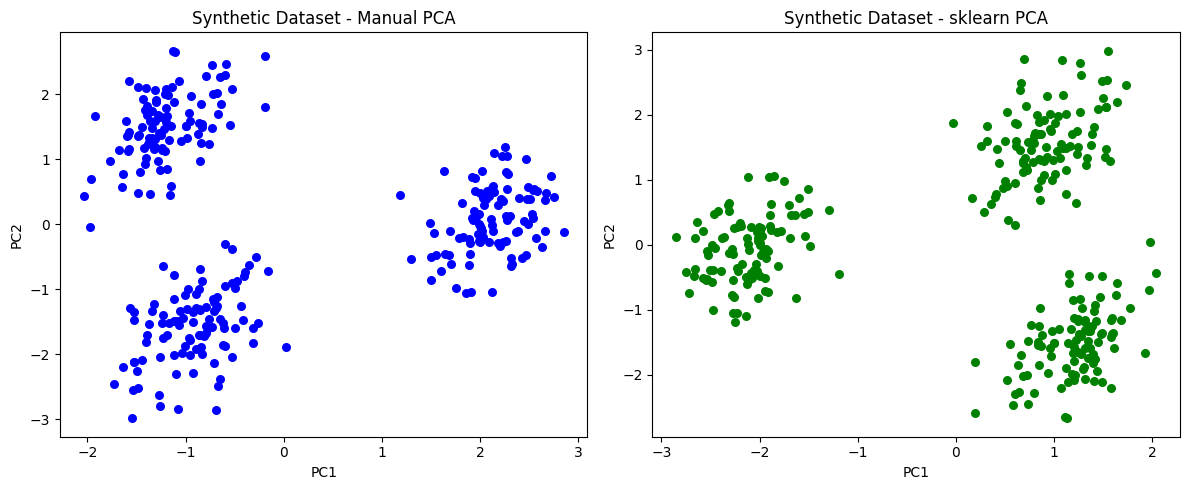

In [4]:
X_syn, y_syn = make_blobs(n_samples=300, centers=3, n_features=5, random_state=42, cluster_std=1.5)

eig_vals_syn, eig_vecs_syn, X_pca_syn = compute_pca(X_syn, "Synthetic Dataset")


====== Iris Dataset ======

Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]

Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors (columns are eigenvectors):
 [[-0.52106591  0.37741762  0.71956635  0.26128628]
 [ 0.26934744  0.92329566 -0.24438178 -0.12350962]
 [-0.5804131   0.02449161 -0.14212637 -0.80144925]
 [-0.56485654  0.06694199 -0.63427274  0.52359713]]

Explained Variance (sklearn PCA): [2.93808505 0.9201649 ]
Explained Variance Ratio: [0.72962445 0.22850762]


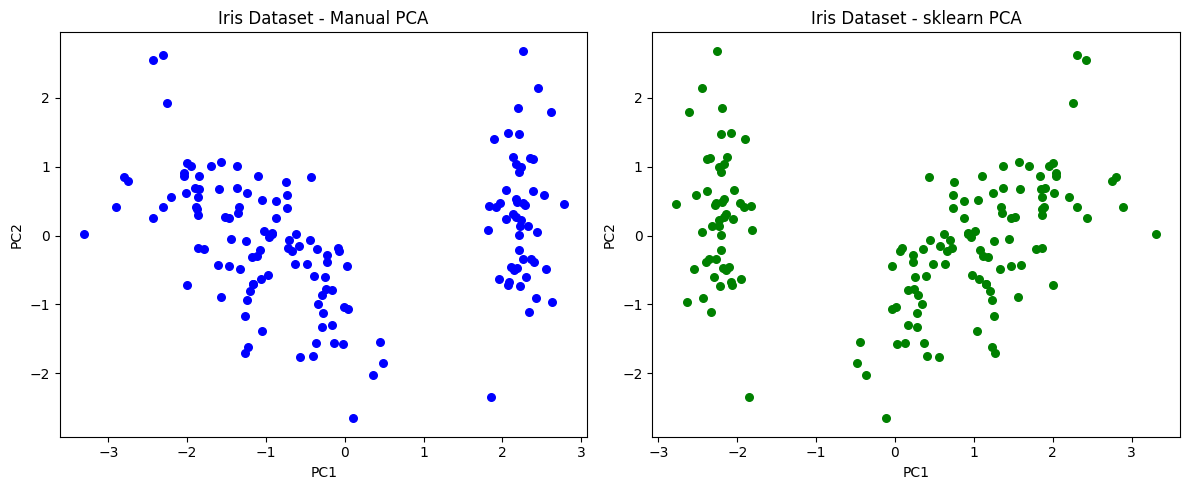

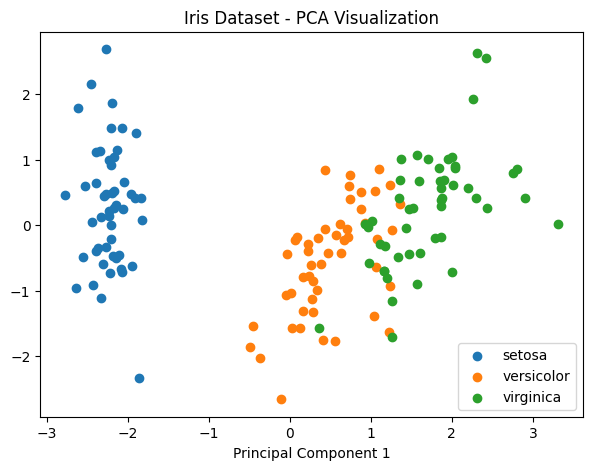

In [6]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
target_names = iris.target_names

eig_vals_iris, eig_vecs_iris, X_pca_iris = compute_pca(X_iris, "Iris Dataset")

# Add color-coded PCA plot for Iris
plt.figure(figsize=(7,5))
for i, target in enumerate(np.unique(y_iris)):
    plt.scatter(X_pca_iris[y_iris == target, 0],
                X_pca_iris[y_iris == target, 1],
                label=target_names[i])
plt.title("Iris Dataset - PCA Visualization")
plt.xlabel("Principal Component 1")
plt.legend()
plt.show()